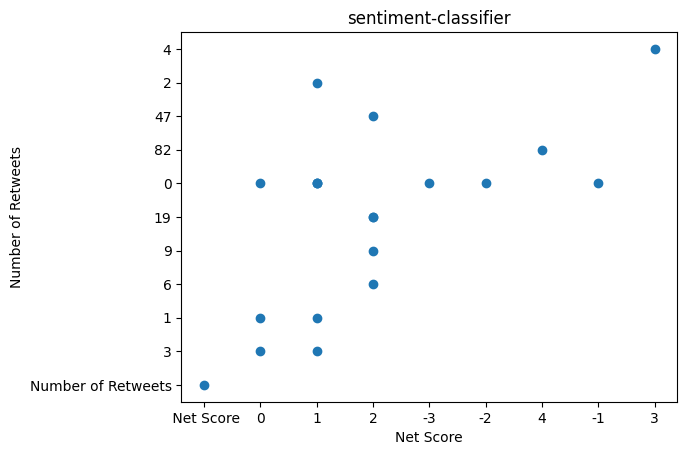

In [15]:
from matplotlib import pyplot as plt
punctuation_chars = ["'", '"', ",", ".", "!", ":", ";", '#', '@']
#replace punctuation_chars
def strip_punctuation(word):
    for i in punctuation_chars:
        word=word.replace(i,"")
    return word


# get negative number
def get_neg(sentence):
    low_sen=sentence.lower()
    lst_sent=low_sen.split()
    neg_sent=[]
    for i in lst_sent:
        clean_word = strip_punctuation(i)
        if clean_word in negative_words:
            neg_sent.append(clean_word)
    len_sent=len(neg_sent)        
    return len_sent


# get Posivte number
def get_pos(sentence):
    low_sen=sentence.lower()
    lst_sent=low_sen.split()
    posi_sent=[]
    for i in lst_sent:
        clean_word = strip_punctuation(i)
        if clean_word in positive_words:
            posi_sent.append(clean_word)
    len_sent=len(posi_sent)        
    return len_sent

    
# lists of words to use
positive_words = []
with open("positive_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            positive_words.append(lin.strip())


negative_words = []
with open("negative_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            negative_words.append(lin.strip())


#open file
with open("project_twitter_data.csv","r") as twitter:
    rowss=twitter.readlines()
    tweet_text=[]
    retweet_count=[]
    reply_count=[]
    i=0
    for line in rowss[1:]:
        columns=line.strip().split(",")
        tweet_text.append(strip_punctuation(columns[0]))
        retweet_count.append(columns[1])
        reply_count.append(columns[2])
    #for i in tweet_text:
    #   print(i,"\n")
twitter.close()   
    
#Write the new File
with open("resulting_data.csv","w") as newfile:
    num_retweet=["Number of Retweets"]
    num_of_reply=[" Number of Replies"]
    positive_num=[" Positive Score"]
    negative_num=[" Negative Score"]
    net_score=[" Net Score"]
    state=["State"]
    for i in range(len(tweet_text)):
        num_retweet.append(retweet_count[i])
        num_of_reply.append(reply_count[i])
        positive_num.append(get_pos(tweet_text[i]))
        negative_num.append(get_neg(tweet_text[i]))
        net_score.append((positive_num[i+1]-negative_num[i+1]))
        if net_score[i+1] >0:
            state.append("Positive")
        elif net_score[i+1]<0:
            state.append("Negative")
        else:
            state.append("Equal")
    
    
     #iteraion to print column    
    for i in range(len(negative_num)):
        newfile.write("{},{},{},{},{},{}\n".format(num_retweet[i], num_of_reply[i], positive_num[i], negative_num[i], net_score[i],state[i]))

       
        #print(num_retweet[i],num_of_reply[i],positive_num[i],negative_num[i],net_score[i],state[i])
   # newfile.write(num_retweet,",",num_of_reply,",",positive_num,",",negative_num,",",net_score,",",state)
    
  
newfile.close()

plt.plot(net_score,num_retweet,'o')
plt.title("sentiment-classifier")
plt.xlabel("Net Score")
plt.ylabel("Number of Retweets")
plt.show()